# Mapping Japan

<img src="images/japan the target map.jpg" width="300">

[Source: David Rumsey Map Collection](https://www.davidrumsey.com/luna/servlet/detail/RUMSEY~8~1~262962~5524075:Japan,-the-target---a-pictorial-Jap)

このラボでは初めて「日本」をベースとしたマッピング分析を行います。日本ベースの地図を作成するには、空間データがどのように構成されているかを理解することが重要である。


## 色んな空間データ

<img src="images/gis data.png" width=400>

[Source: ESRI Japan](https://www.esrij.com/gis-guide/gis-datamodel/gis-datamodel/)

利用可能なさまざまな空間データ形式と、どの形式が Python での使用に適用できるかを見てみましょう。



### CSV

<img src="images/csv.png" width=100>

csv ファイルは「カンマ区切り値」であり、基本的には EXCEL や Google スプレッドシートなどのスプレッドシート アプリケーションで開くことができる単純なテキスト ファイルです。 CSV ファイルを「空間」ファイルにするには、緯度と経度のフィールドを含める必要があり、これらのフィールドは地図上の座標に変換されます。 GIS 用の CSV ファイルは、通常、ポイント データに使用されます。


### geojson

<img src="images/geojson.png" width=150>

geojson ファイルは地理的な json ファイルであり、json は「JavaScript オブジェクト表記法」を表します。 JavaScript 形式として相互運用性が高く、Python を含むほとんどの GIS アプリケーションで使用できます。 また、オープンソース データ ソリューションとしても広く受け入れられており、オンライン空間データの視覚化およびオーサリング ツールである geojson.io によってサポートされています。 これは、Python ベースの GIS 解析に推奨されるアプローチです。

[geojson.io](https://geojson.io/)

### shapefile

<img src="images/shp.png" width=150>

シェープファイルは、GIS ソフトウェア ベンダーである ESRI によって作成された独自のデータ形式です。 これは長い間存在しており、引き続き GIS データの標準であり、多くの組織がこの形式のデータを使用および提供しています。 シェープファイルは多くのファイルを組み合わせたものであり、それだけに扱いが難しいですが、広く使われ続けていることを考えると、プロジェクトで使用する可能性があります。 シェープファイルは geopandas でサポートされており、Python で使用できます。







https://www.esrij.com/products/japan-shp/



## GIS と言えば

では、GIS 研究の一般的な状況はどのようなものでしょうか? GIS サービスを提供するベンダーは数多くありますが、業界のリーダーをいくつか紹介します。


### ESRI

<img src="images/esri.png">

[ESRI Japan](https://www.esrij.com/)

ESRI はカリフォルニア州レッドランズに拠点を置き、70 年代から存在しています。 ジャック・デンジャーモンドによって設立され、多くの人が現代の地図製作法の父と考えています。 ESRI は最も歴史のある GIS 企業の 1 つであり、空間ソリューションにおける業界大手でもあります。 彼らは政府機関や学術機関とのパートナーシップで知られており、世界的に存在感を持っています。



### Mapbox

<img src="images/mapbox.png" width=500>

[Mapbox Japan](https://www.mapbox.jp/)

Mapboxは、カスタム地図や位置情報ベースのアプリケーションを作成するためのプラットフォームを提供する会社です。高品質でカスタマイズ可能な地図データと、さまざまなデザインスタイルやインタラクティブな機能を提供しています。また、地図データの統合や解析、リアルタイムの位置情報処理など、高度な地理情報システム（GIS）の機能も提供しています。


### Google Earth

<img src="images/ge.png" width=500>

[Google Earth](https://earth.google.com/web)

Google の地図製品は数多くありますが、今回は、これまでに作成された最初の主力 3D マッピング プラットフォームの 1 つである Google Earth を紹介します。地球の表面を自由に探索し、ズームインやズームアウト、回転、傾けるなどの操作が可能です。また、街の建物や地形の3D表示、ストリートビュー（地上の画像）の閲覧、地図上に注釈やマーカーを追加するなどの機能も提供されています。

Google Earthは、教育や観光、研究、衛生管理、都市計画など、さまざまな目的で活用されています。また、歴史的な地理情報や自然災害の追跡、環境変化のモニタリングなどにも役立てられています。

- [Urban expansion](https://earth.google.com/web/@25.12809983,55.29469501,32a,74819d,35y,314h,41t,0r/data=CisSKRIgMGM5NzE2MWM0Njk4MTFlYWJlMTMyZGUyNWIyYWZmNjkiBWR1YmFp)
- [Tokyo at night](https://earth.google.com/web/@35.71029405,139.73076948,4.48363497a,4507464.54025819d,35y,0h,0t,0r/data=CisSKRIgMGY3ZTJkYzdlOGExMTFlNjk5MGQ2ZjgxOGQ2OWE2ZTciBXRva3lv)
- [Tokyo's heat island effect](https://earth.google.com/web/@35.70892705,139.73197113,5.0183326a,4507521.99932186d,35y,0h,0t,0r/data=CjASLhIgYTk3NzMwMDc0NjE3MTFlYWJjNDIyN2FkODE2NGU5NzciCnZveV9zcGxhc2g)

# Today's libraries

このラボで使うモジュールを初めに import しましょう。

In [1]:
import geopandas as gpd
import pandas as pd

## Part 1 - GIS Dataのダウンロードと読み込み

<img src="images/kokudo.png" width=400>

このラボではすでに【千葉県】の行政区域データを国土交通省からダウンロードしたものを使います。クラスサイトから`chiba_ku.geojson`をダウンロードできますが、元のデータはここからobtainした：

https://nlftp.mlit.go.jp/

ダウンロードする順序は：

- ➡️ 国土数値情報
- ➡️ 行政区域
- ➡️ 千葉県

＊注意：ダウンロードするにあたりアンケートを記入後、.zipファイルを unzip する必要がある。

unzip したファイルの中の N03-23_12_230101.geojson を今週のフォルダーの中に入れる。このラボではこのgeojsonファイルを`chiba_ku.geojson`とrenameされたものを使う。

In [2]:
# データを変数に入れる
chiba_ku = gpd.read_file('chiba_ku.geojson')

<Axes: >

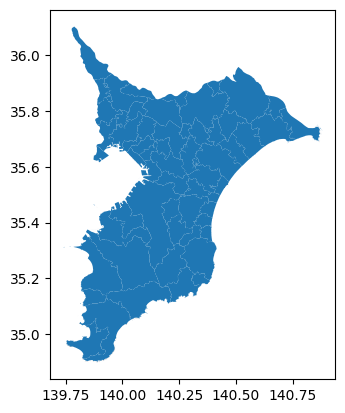

In [3]:
# とりあえずマップとしてアウトプット
chiba_ku.plot()

In [4]:
# 最初の５列は？
chiba_ku.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588..."
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624..."
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709..."
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673..."
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654..."


In [6]:
chiba_ku.sample(6)

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
457,千葉県,NaN,NaN,館山市,12205,"POLYGON ((139.75912 34.95909, 139.75912 34.959..."
1861,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.96678 34.95326, 139.96677 34.953..."
19,千葉県,NaN,NaN,銚子市,12202,"POLYGON ((140.85670 35.69115, 140.85670 35.691..."
1111,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.89909 34.90054, 139.89909 34.900..."
2210,千葉県,NaN,夷隅郡,御宿町,12443,"POLYGON ((140.34990 35.17618, 140.34978 35.176..."
1700,千葉県,NaN,NaN,南房総市,12234,"POLYGON ((139.96012 34.93640, 139.96011 34.936..."


In [7]:
# データの情報
chiba_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2265 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2265 non-null   object  
 4   N03_007   2265 non-null   object  
 5   geometry  2265 non-null   geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 106.3+ KB


## Part 2 - 国勢調査データをダウンロード

<img src="images/estat.png" width=400>

https://www.e-stat.go.jp/

次に、国勢調査の【人口総数】データをダウンロードします。 このデータは後に先ほどダウンロードした千葉区データと merge (join) します。

ダウロードする順序：

- ➡️ 統計データを活用する 
- ➡️ 地図 
- ➡️ 統計データダウンロード 
- ➡️ 国勢調査 
- ➡️ 2020年 
- ➡️ 小地域 
- ➡️ 男女別人口総数及び世帯総数
- ➡️ 12 千葉県　CSV

### Data cleanup

データを使用できるようにするには、まず Excel でデータをクリーンアップする必要があります。 

🧐　ここで注意！e-Statでは【CSV】とは書いてあるもののダウンロードして unzip してみたところ 【txt】ファイルではないか！

txt ファイルを Excel で開きます。

<img src="images/excel import txt.png" width=500>

次にヘッダーを変えます。これから：

<img src="images/excel1.png" width=500>



これに：

<img src="images/excel2.png" width=500>



空白の２行目を削除するように

<img src="images/excel3.png" width=500>

最後にファイルを「名前つけて保存」(save as)をして CSV UTF-8 フォーマットで chiba.csv と名づけて保存。

<img src="images/excel utf.png" width=500>

In [9]:
chiba_pop = pd.read_csv('chiba.csv')

In [12]:
chiba_pop.sample(5)

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
5705,122350420,2,匝瑳市,金原,0,NaN,NaN,113,58,55,48
2026,122071280,3,松戸市,緑ケ丘,0,NaN,NaN,1711,821,890,917
3370,12217094007,4,柏市,松葉町七丁目,0,NaN,NaN,1100,532,568,509
990,12203045004,4,市川市,大野町四丁目,0,NaN,NaN,3341,1716,1625,1389
1396,12204075005,4,船橋市,高根台五丁目,0,NaN,NaN,1309,646,663,847


In [11]:
chiba_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 0 to 6766
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KEY_CODE  6767 non-null   int64  
 1   HYOSYO    6767 non-null   int64  
 2   CITYNAME  6767 non-null   object 
 3   NAME      6706 non-null   object 
 4   HTKSYORI  6767 non-null   int64  
 5   HTKSAKI   0 non-null      float64
 6   GASSAN    0 non-null      float64
 7   人口総数      6767 non-null   object 
 8   男         6767 non-null   object 
 9   女         6767 non-null   object 
 10  世帯総数      6767 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 581.7+ KB


## Part 3 - GISデータと国勢調査データを`Merge`する

<img src="images/merge.png" width=500>

Mergeするには次のチェックポイントを確認：

1. mergeするfieldを決める
1. field names が同じであることを確認。違う場合は同じにする。
1. field達が同じ data type であることを確認

この二つがオッケーであれば merge function を使って実行 

### 3-1 Mergeするfieldを決めよう

- `chiba_ku` → `N03_007`
- `chiba_pop` → `KEY_CODE`

### 3-2 field names を揃えよう

<img src="images/merge2.png" width=500>

残念ながらmergeするfieldnameが違う😩

`rename` functionを使って一致するようにしましょう。

この場合は `KEY_CODE` に一致しよう。

In [13]:
# rename
chiba_ku.rename(columns={'N03_007':'KEY_CODE'},inplace=True)

In [14]:
# check the new fieldname
chiba_ku

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588..."
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624..."
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709..."
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673..."
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654..."
...,...,...,...,...,...,...
2260,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82032 35.15010, 139.82028 35.150..."
2261,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82142 35.15018, 139.82139 35.150..."
2262,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82567 35.15224, 139.82554 35.152..."
2263,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.85503 35.16407, 139.85517 35.164..."


### Merge する field の data typeが同じかどうかを確認

Oh now! datatypeも違う😩

- `chiba_ku['KEY_CODE]` → OBJECT
- `chiba_pop['KEY_CODE']` → int64

では両方 int にしましょう

In [15]:
# OBJECTからintに変える
chiba_ku['KEY_CODE'] = chiba_ku['KEY_CODE'].astype(int)

In [16]:
# checkする
chiba_ku.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2265 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2265 non-null   object  
 4   KEY_CODE  2265 non-null   int32   
 5   geometry  2265 non-null   geometry
dtypes: float64(1), geometry(1), int32(1), object(3)
memory usage: 97.5+ KB


In [17]:
# ここでようやく merge コマンドで統合させて、新しい変数に入れる
chiba_ku_pop = chiba_ku.merge(chiba_pop,on='KEY_CODE')

In [18]:
# check!
chiba_ku_pop

,N03_001,N03_002,N03_003,N03_004,KEY_CODE,geometry,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,人口総数,男,女,世帯総数
0,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.08318 35.58821, 140.08333 35.588...",1,千葉市中央区,NaN,0,NaN,NaN,211736,105766,105970,109336
1,千葉県,NaN,千葉市,千葉市中央区,12101,"POLYGON ((140.12789 35.62462, 140.12797 35.624...",1,千葉市中央区,NaN,0,NaN,NaN,211736,105766,105970,109336
2,千葉県,NaN,千葉市,千葉市花見川区,12102,"POLYGON ((140.11733 35.70958, 140.11755 35.709...",1,千葉市花見川区,NaN,0,NaN,NaN,177328,87280,90048,81123
3,千葉県,NaN,千葉市,千葉市稲毛区,12103,"POLYGON ((140.13703 35.67385, 140.13697 35.673...",1,千葉市稲毛区,NaN,0,NaN,NaN,160582,80345,80237,74796
4,千葉県,NaN,千葉市,千葉市若葉区,12104,"POLYGON ((140.15469 35.65408, 140.15471 35.654...",1,千葉市若葉区,NaN,0,NaN,NaN,146940,73000,73940,64840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82093 35.14996, 139.82089 35.149...",1,鋸南町,NaN,0,NaN,NaN,6993,3356,3637,3034
2260,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82032 35.15010, 139.82028 35.150...",1,鋸南町,NaN,0,NaN,NaN,6993,3356,3637,3034
2261,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82142 35.15018, 139.82139 35.150...",1,鋸南町,NaN,0,NaN,NaN,6993,3356,3637,3034
2262,千葉県,NaN,安房郡,鋸南町,12463,"POLYGON ((139.82567 35.15224, 139.82554 35.152...",1,鋸南町,NaN,0,NaN,NaN,6993,3356,3637,3034


## Part 4 - Choropleth map を作ろう

<img src="https://visualizing.jp/assets/fletcher-map-population.jpg" width=300>

そもそも Choropleth map ってなに？

https://visualizing.jp/choropleth-map/



いよいよマップの時間！

Choropleth map を作る手順は：

1. どのフィールドをマップするかを決める
1. そのフィールドが numeric であることを確認
1. マップを作る！

### 4-1 フィールドを決める

まずは人口マップを作りたいので `人口総数` フィールドを使おう。

### 4-2 フィールドが numeric であることを確認

In [19]:
chiba_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2264 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2264 non-null   object  
 4   KEY_CODE  2264 non-null   int32   
 5   geometry  2264 non-null   geometry
 6   HYOSYO    2264 non-null   int64   
 7   CITYNAME  2264 non-null   object  
 8   NAME      0 non-null      object  
 9   HTKSYORI  2264 non-null   int64   
 10  HTKSAKI   0 non-null      float64 
 11  GASSAN    0 non-null      float64 
 12  人口総数      2264 non-null   object  
 13  男         2264 non-null   object  
 14  女         2264 non-null   object  
 15  世帯総数      2264 non-null   object  
dtypes: float64(3), geometry(1), int32(1), int64(2), object(9)
memory usage: 274.3+ KB


Oh no😩! やっぱり int ではなく object だった。

Let's fix that!

In [20]:
# change from OBJECT to int
chiba_ku_pop['人口総数'] = chiba_ku_pop['人口総数'].astype(int)

In [21]:
# check
chiba_ku_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N03_001   2264 non-null   object  
 1   N03_002   0 non-null      float64 
 2   N03_003   86 non-null     object  
 3   N03_004   2264 non-null   object  
 4   KEY_CODE  2264 non-null   int32   
 5   geometry  2264 non-null   geometry
 6   HYOSYO    2264 non-null   int64   
 7   CITYNAME  2264 non-null   object  
 8   NAME      0 non-null      object  
 9   HTKSYORI  2264 non-null   int64   
 10  HTKSAKI   0 non-null      float64 
 11  GASSAN    0 non-null      float64 
 12  人口総数      2264 non-null   int32   
 13  男         2264 non-null   object  
 14  女         2264 non-null   object  
 15  世帯総数      2264 non-null   object  
dtypes: float64(3), geometry(1), int32(2), int64(2), object(8)
memory usage: 265.4+ KB


### 4-3 Let's map!

<Axes: >

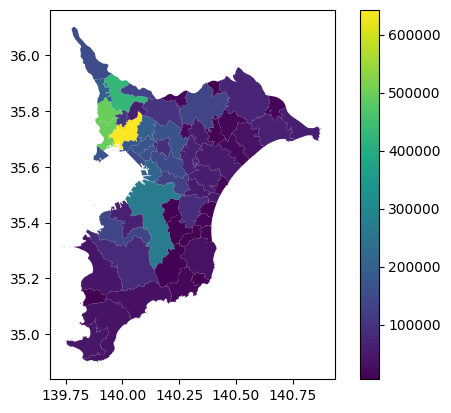

In [22]:
chiba_ku_pop.plot(column='人口総数',legend=True)

## Size

`figsize=(10,10)`
- default (6.4,4.8)
- width, height, units in inches

<Axes: >

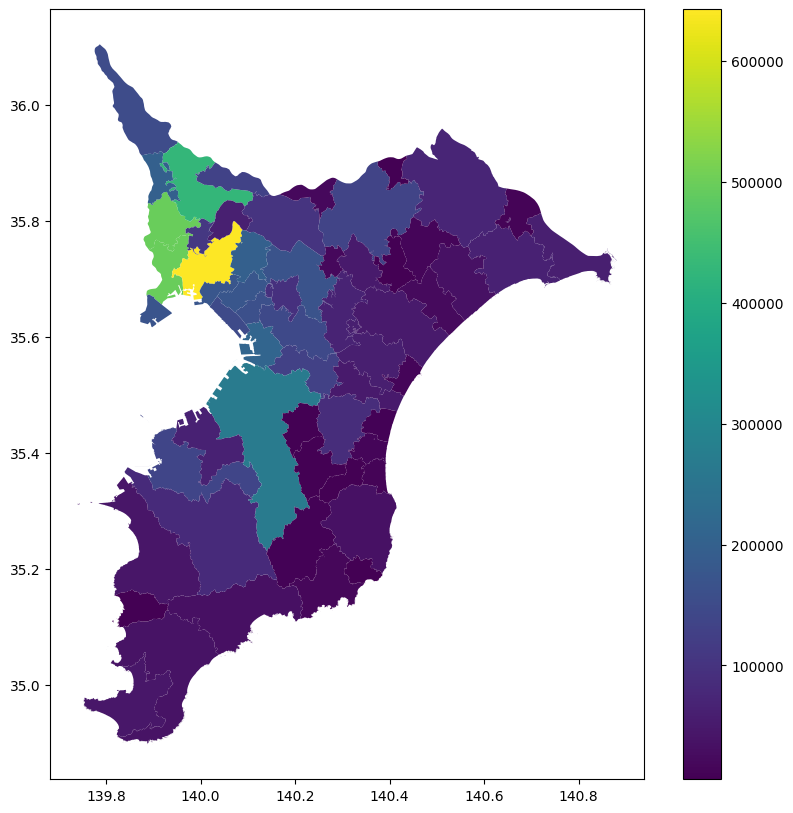

In [23]:
chiba_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True)

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="images/sphx_glr_colormaps_002.webp">
<img src="images/sphx_glr_colormaps_003.webp">
<img src="images/sphx_glr_colormaps_004.webp">

<Axes: >

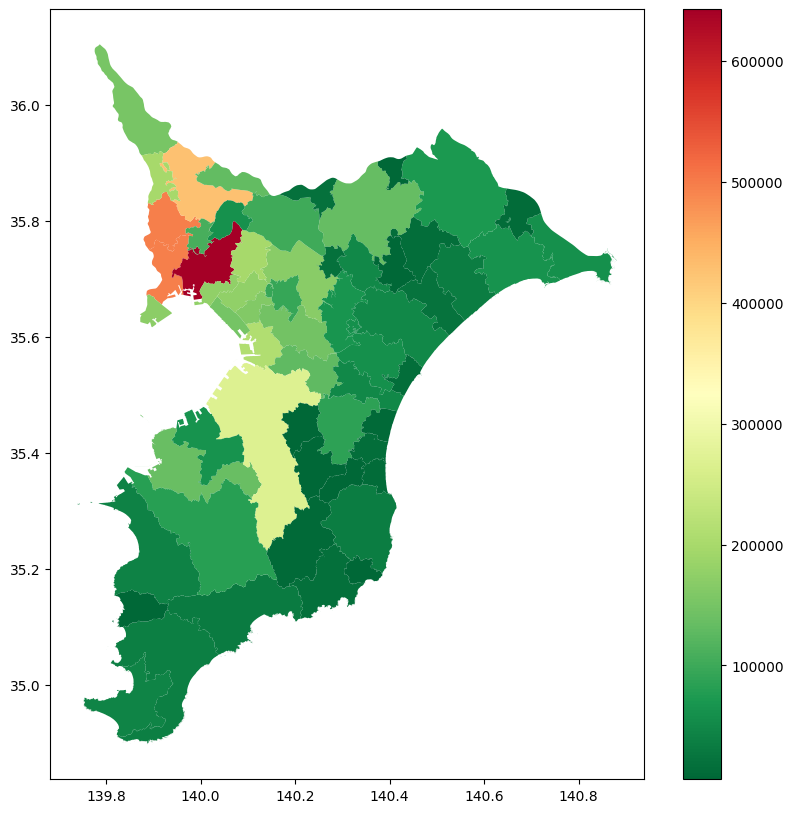

In [24]:
chiba_ku_pop.plot(figsize=(10,10),
                  column='人口総数',
                  legend=True,
                  cmap='RdYlGn_r')

## Stay tuned...

We will learn many more options in subsequent weeks!